In [2]:
import numpy as np
import sklearn
import torch
import scipy
from matplotlib import pylab as plt
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/artem/Main/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
N_SAMPLES  = 50
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.5], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

random_state=20
test_datasets_lite = [
    data_generator(50, density=[0.7], random_state=random_state),
    data_generator(50, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(50, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(50, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(50, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_medium = [
    data_generator(200, density=[0.7], random_state=random_state),
    data_generator(200, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(200, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(200, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_hard = [
    data_generator(500, density=[0.7], random_state=random_state + 1),
    data_generator(500, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 1, 0, 0.2)], [1], random_state=random_state + 1),
    data_generator(500, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state + 1),
]

test_datasets_pro = [
    np.random.random(size=(1000, 2)),
    data_generator(1000, density=[0.7], random_state=random_state),
    data_generator(1000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(1000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(1000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

np.random.seed(random_state)
test_datasets_monster = [
    np.random.random(size=(5000, 2)),
    data_generator(5000, density=[0.7], random_state=random_state),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

## Generate pretty data

(200, 1) (30, 1)
Linear loss: 58.22379342695287


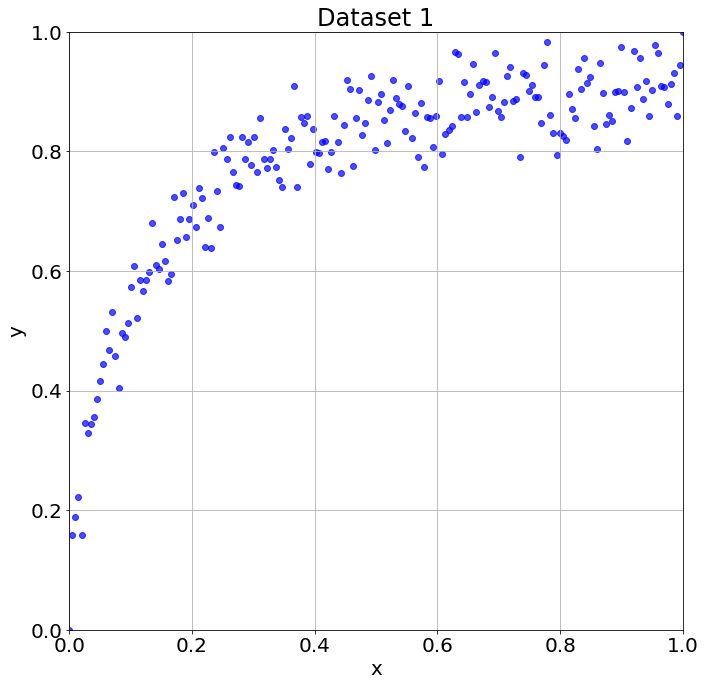

Linear loss: 74.32547498976234


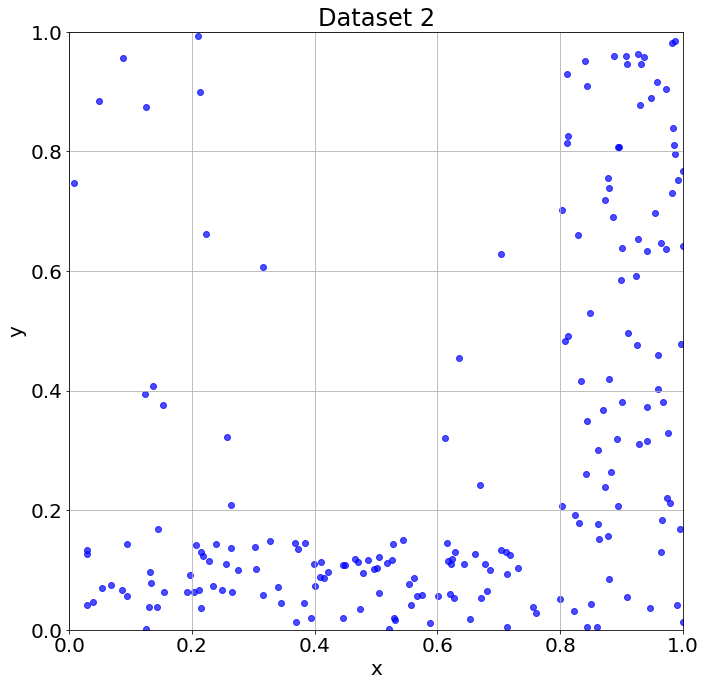

Linear loss: 69.73840848365876


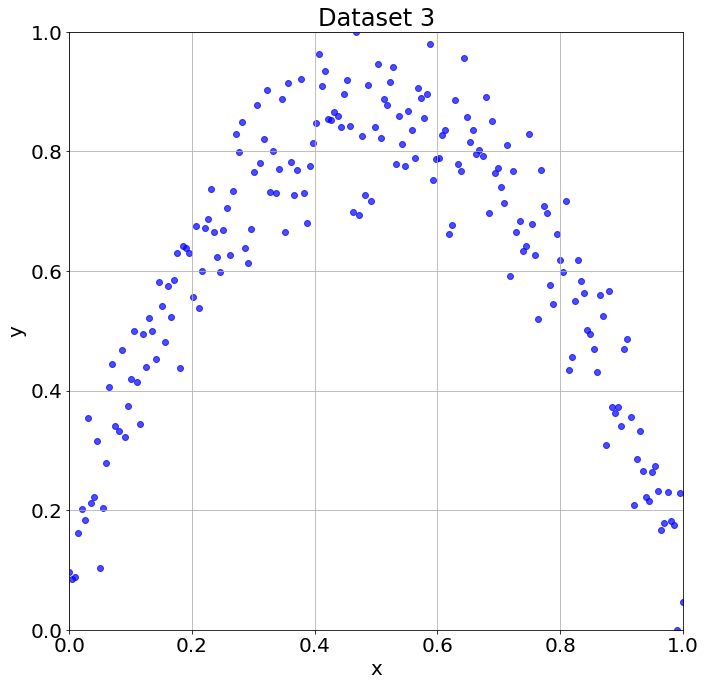

Linear loss: 74.33146469085386


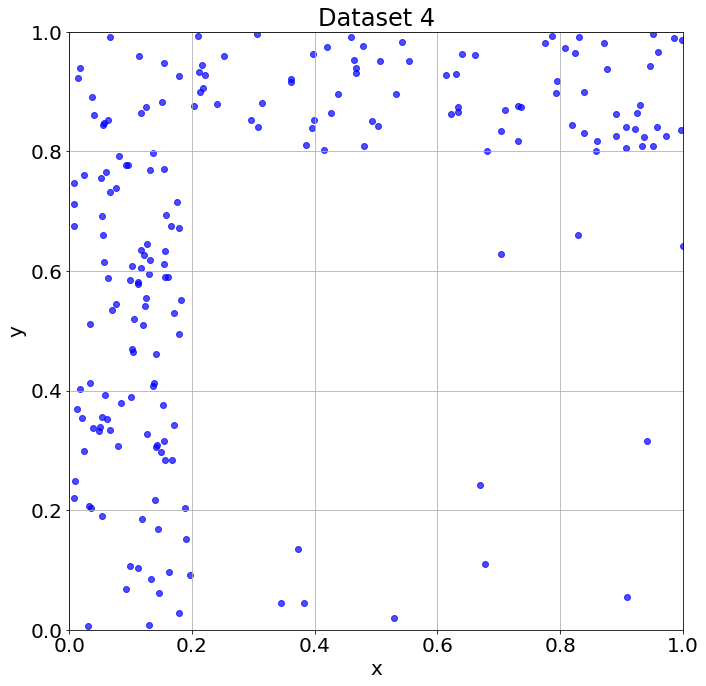

Linear loss: 21.78666536213388


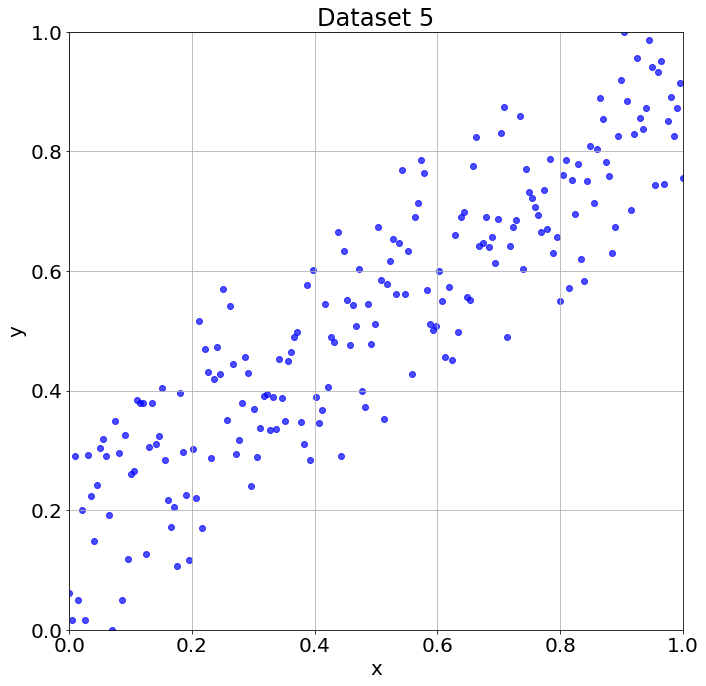

In [4]:
from scipy import stats
PRETTY_DATASETS_CUP = 200
x = np.linspace(0, 8, PRETTY_DATASETS_CUP).reshape(-1, 1)

np.random.seed(20)
noise0 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(26)
noise1 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(30)
noise2 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(36)
noise3 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(40)
noise4 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3
np.random.seed(46)
noise5 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3


chi2_y = stats.chi2(df=1).cdf(x) + noise0 - noise1
chi2_y = (chi2_y - np.min(chi2_y)) / (np.max(chi2_y) - np.min(chi2_y))

parab = -4 * (x/8 -  0.5)**2 + 1 + noise2 - noise3
parab = (parab - np.min(parab)) / (np.max(parab) - np.min(parab))

print(x.shape, np.random.random(size=(30, 1)).shape)
linear = x / 8 + noise4 - noise5
linear = (linear - np.min(linear)) / (np.max(linear) - np.min(linear))

np.random.seed(20)
Pretty_datasets = [
    np.hstack((x / 8, chi2_y)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.8, 0, 0.15), (0.8, 1, 0, 1)], density=[0.45, 0.38], random_state=random_state),
    np.hstack((x / 8, parab)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    np.hstack((x / 8, linear))
]

matplotlib.rcParams.update({'font.size': 20})
for i, data in enumerate(Pretty_datasets):
    plt.figure(figsize=[11,11])
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, marker="o", c="blue")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid(True)
    plt.title("Dataset " + str(i + 1))
    plt.savefig("Dataset" + str(i + 1) + ".png")
    print("Linear loss:", np.sum(np.abs(data[:, 0] - data[:, 1])))
    plt.show()

In [5]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 21})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[15,15])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(name + " approximation")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid()
    plt.legend(loc='best')
    #plt.show()

In [6]:
import time
def RunTests(estimator, dataset, name=""):
    """
    Fit estimator on each dataset in datasets
    Calculate losses
    Build approximation curve
    """
    matplotlib.rcParams.update({'font.size': 21})
    for i, data in enumerate(dataset):
        print("Dataset", i, ":")
        
        start_time = time.time()
        losses = estimator.fit(data[:, 0], data[:, 1])
        
        print("Fitting time:", (time.time() - start_time) / 60, "min")
        print("alpha, beta:", estimator.alpha, estimator.beta)
        
        ApproxPlot(data[:, 0], data[:, 1], estimator.PredictProba, name)
        #plt.savefig(name + "Plot" + str(i))
        plt.show()
        plt.figure(figsize=[15,15])
        plt.scatter(np.arange(1, len(losses) + 1), losses, marker='o', c='blue')
        
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("L1 discrepancy")
        #plt.legend(loc="best")
        plt.grid()
        #plt.savefig(name + "Losses" + str(i))
        plt.show()

# My realization of cumulative beta distribution function:
$F(x, \alpha, \beta) = \frac{B(x, \alpha, \beta)}{B(\alpha, \beta)} = \frac{\int^x_0{t^{\alpha - 1} \cdot (1 - t)^{\beta - 1} dt}}{\int^1_0{t^{\alpha - 1} \cdot (1 - t)^{\beta - 1} dt}}$

In [7]:
def DBeta__(alpha, beta, x):
    return (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

def Beta(alpha, beta, x, N=100):
    if x == 0:
        return x 
    
    res1 = torch.tensor(0,     dtype = float)
    res2 = torch.tensor(0,     dtype = float)
    step = torch.tensor(1 / N, dtype = float)
    i = 0
    last = x
    
    while step * i + step / 2 < last:
        res1 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
        
    res2 = res1.clone()
    while step * i + step / 2 < 1:
        res2 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
    
    return res1 / res2

# parameters in my beta could be less than zero, it is legally, becouse I define function in x=0, x=1

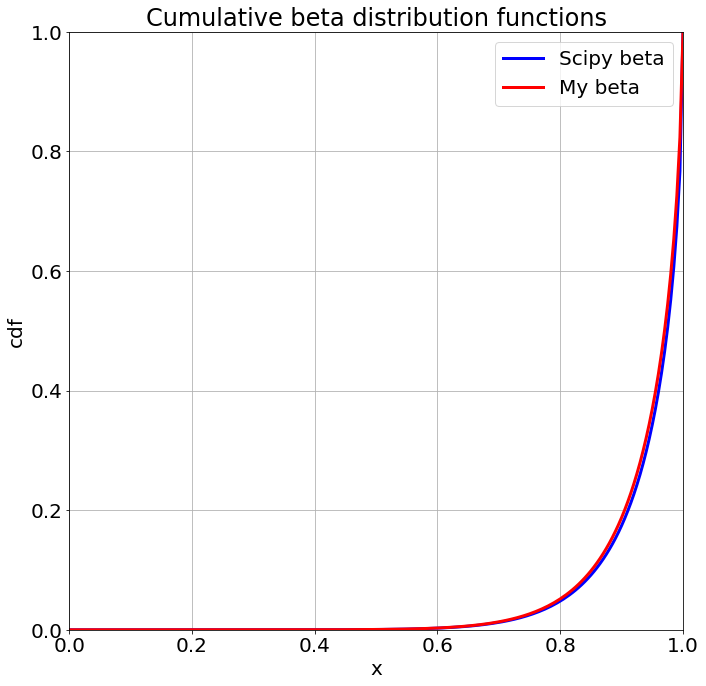

In [10]:
# Comparison my beta with scipy beta cdf
from scipy import stats
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
alpha, beta = 9, 0.5
x = np.linspace(0, 1, 201)
plt.figure(figsize=[11,11])

plt.plot(x, stats.beta.cdf(x, alpha, beta), linewidth=3, c='b',
         label="Scipy beta")
plt.plot(x, [Beta(alpha, beta, x_i, 200) for x_i in x], c = 'r', linewidth=3, label="My beta")
plt.title("Cumulative beta distribution functions")

plt.xlabel("x")
plt.ylabel("cdf")
plt.xlim(0, 1.)
plt.ylim(0, 1.)

plt.legend(loc='best')
plt.grid()
plt.savefig("cdfs.png")
plt.show()

# Implementation of regression by my beta cdf

In [9]:
REG=0
SMALL_CONST = 1e-16
class BetaRegression:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return Beta(self.alpha, self.beta, x)
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) 
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float)
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False, device=device)
        loss = []
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
            loss_i.backward()
            optimizer.step()
            
            #if self.alpha.data < 0:
            #    self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            #if self.beta.data < 0:
            #    self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())

        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


Dataset 0 :
Fitting time: 12.99123109181722 min
alpha, beta: 0.08790516685418036 0.8447680548691793
Beta cumulative distribution function loss = 9.715249782139434
liear function loss = 58.22379342695287


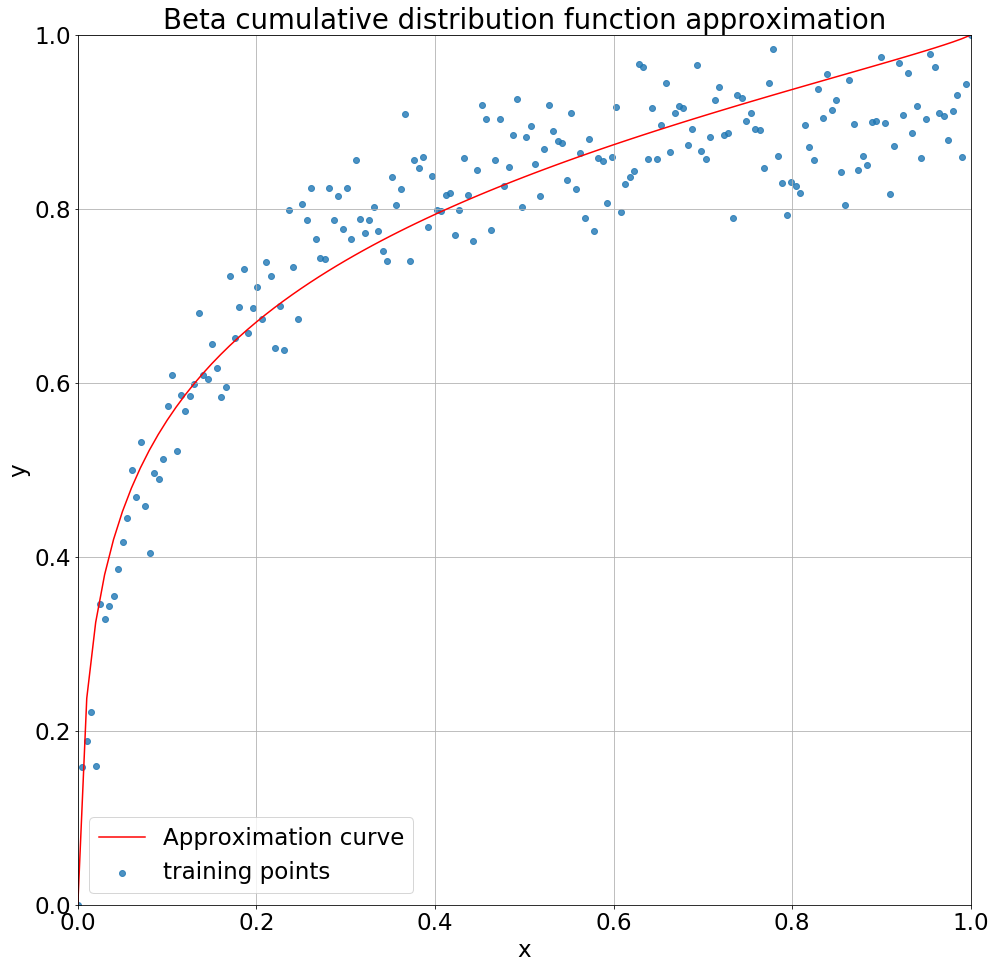

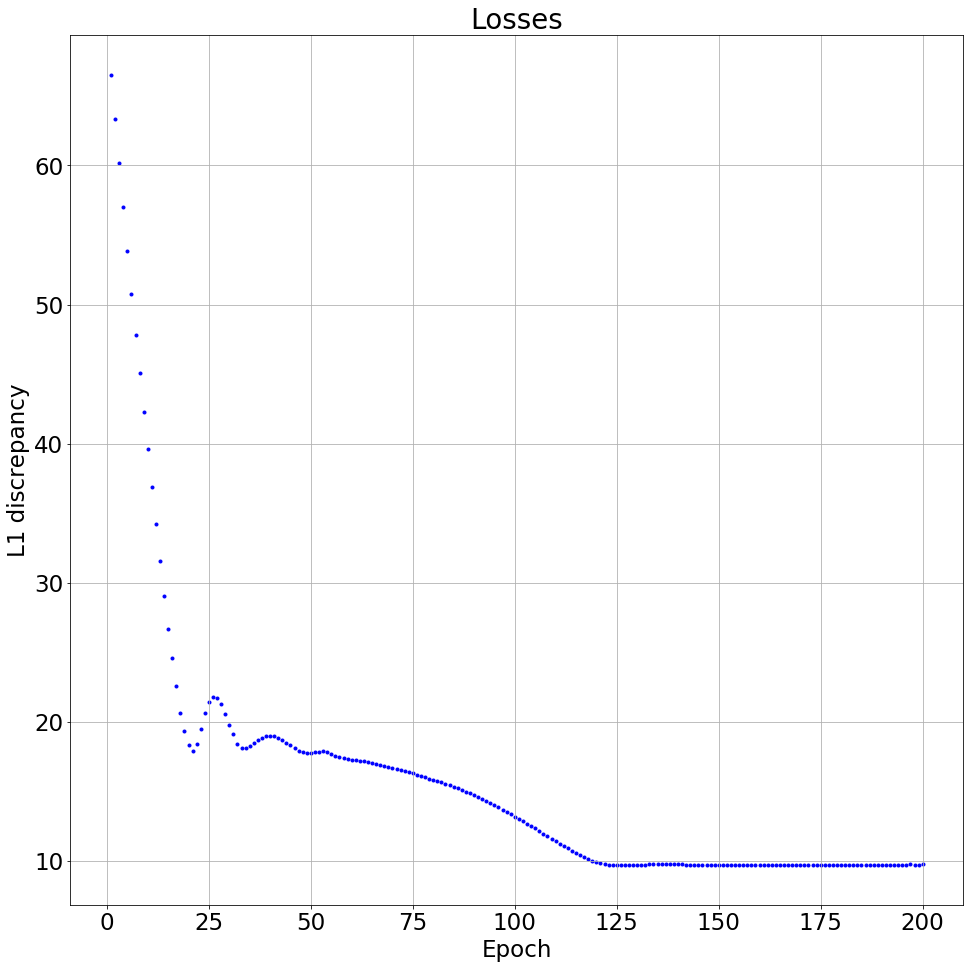

Dataset 1 :
Fitting time: 12.574445021152496 min
alpha, beta: 2.2450001600267955 0.3184919580853657
Beta cumulative distribution function loss = 39.44112701623801
liear function loss = 74.32547498976234


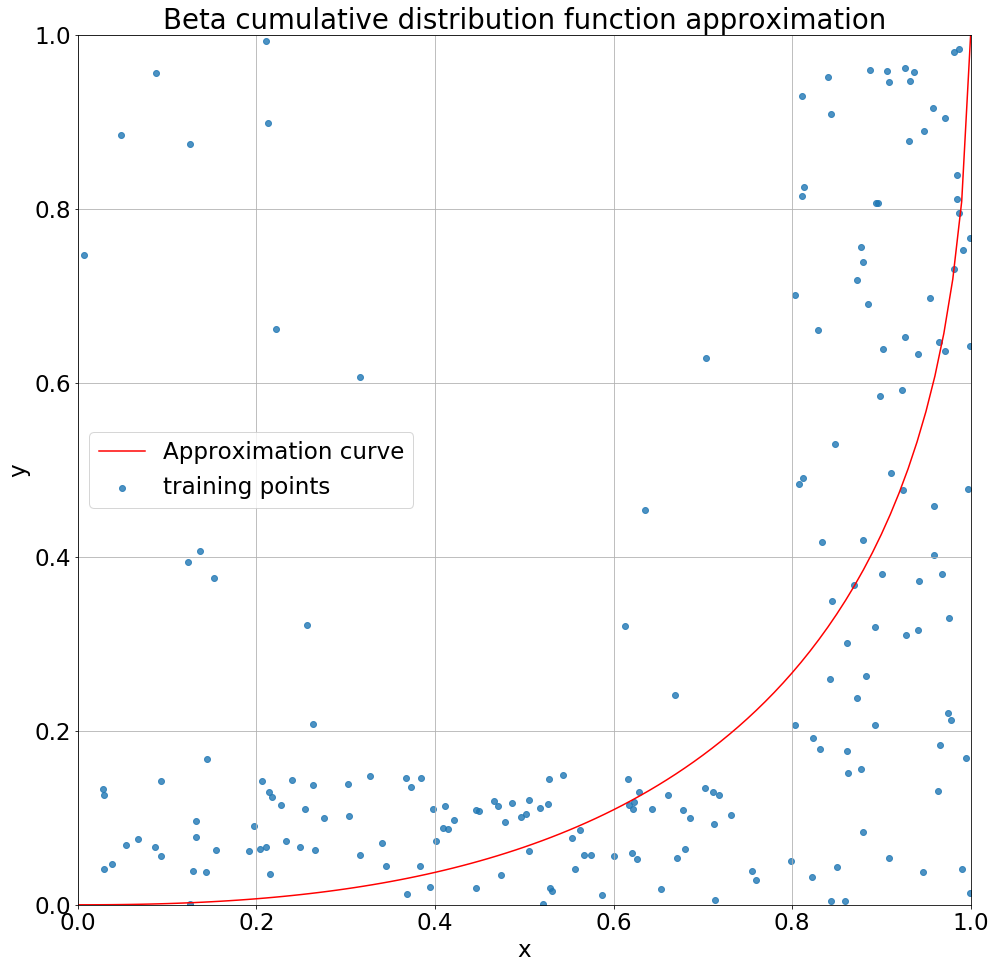

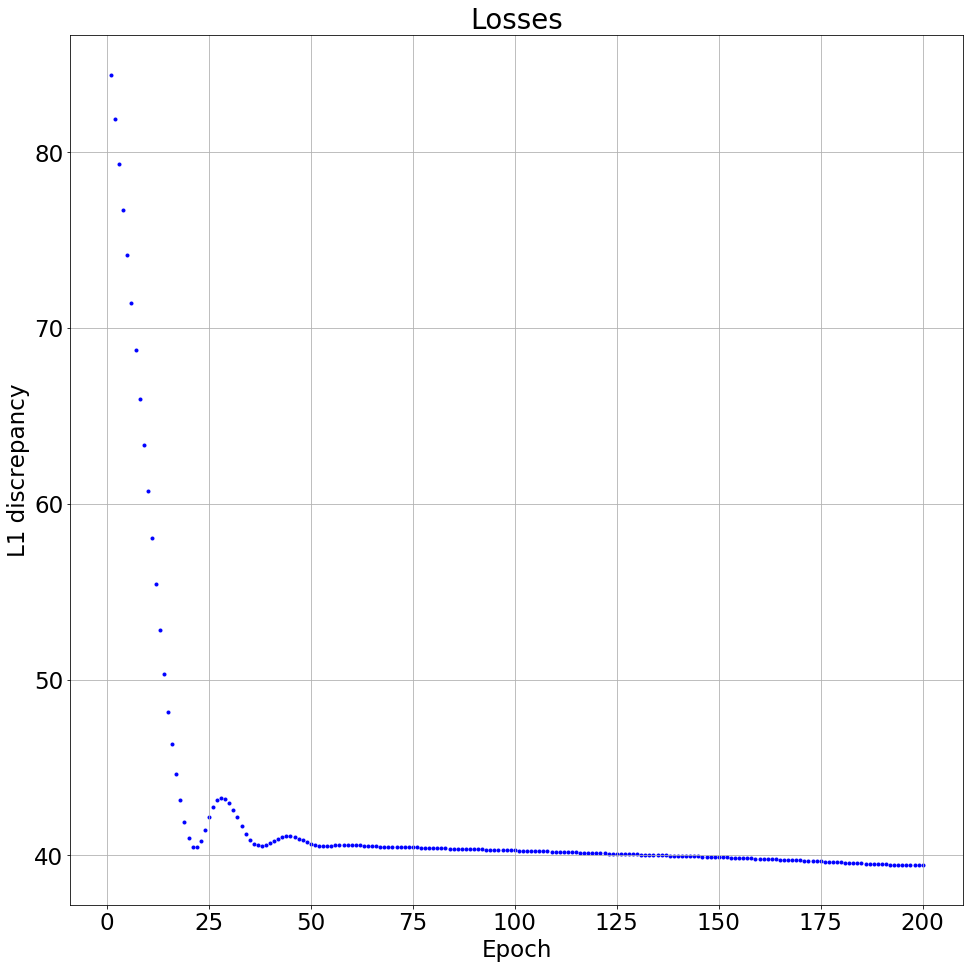

Dataset 2 :
Fitting time: 12.516366668542226 min
alpha, beta: -0.2844925184508491 -0.04748581624274155
Beta cumulative distribution function loss = 37.652081336547866
liear function loss = 69.73840848365876


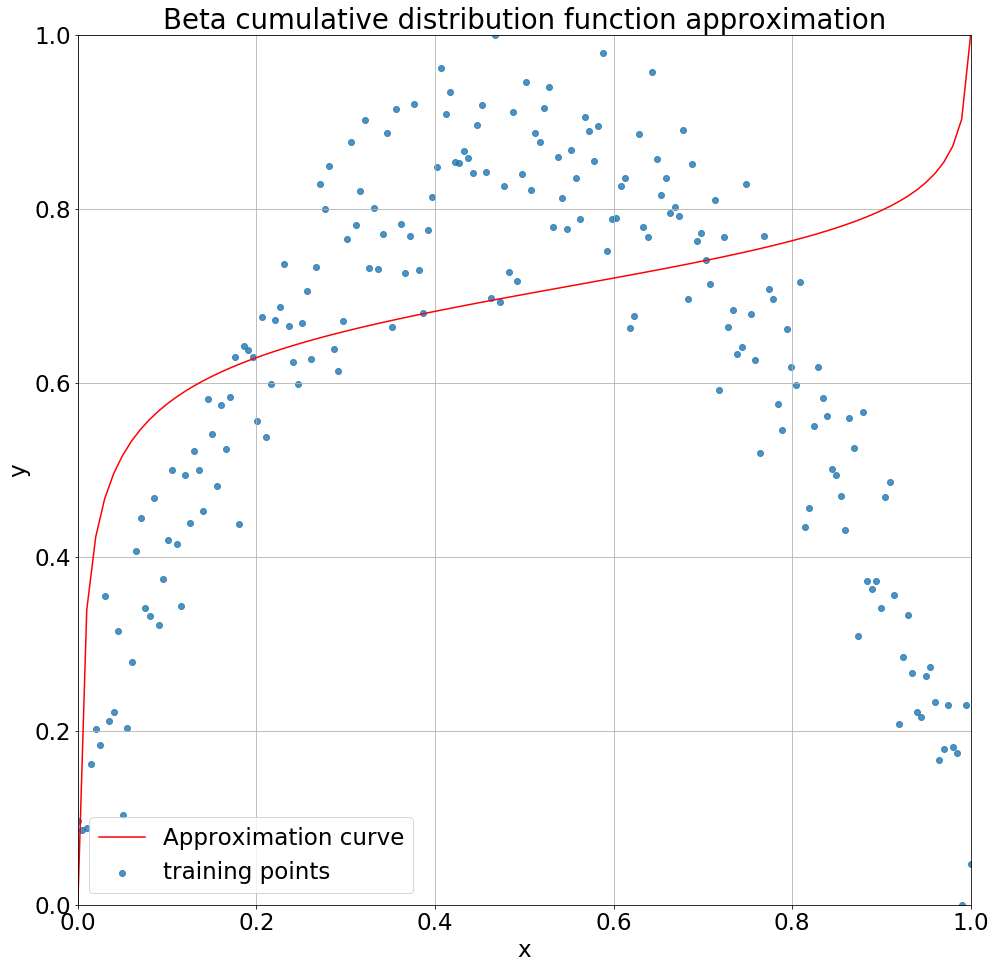

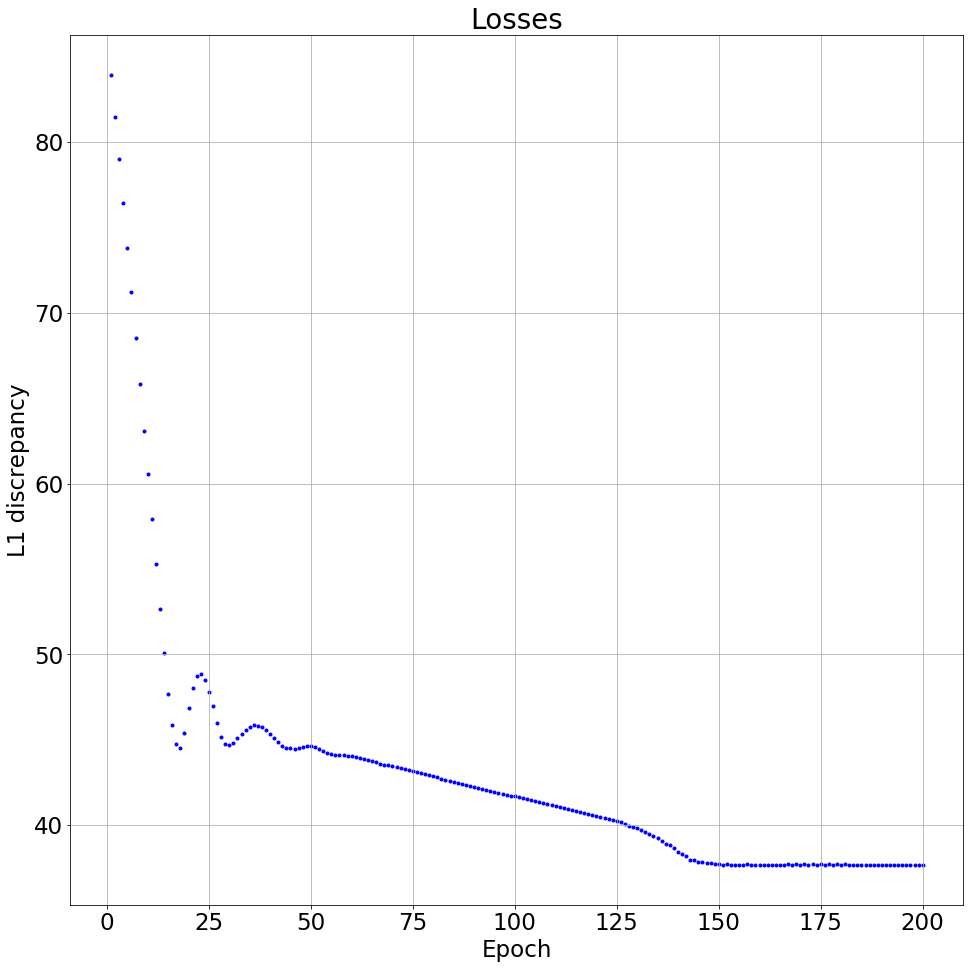

Dataset 3 :


In [ ]:
est = BetaRegression()
RunTests(est, Pretty_datasets, "Beta cumulative distribution function")